## Problem Statement

BigMart sales data for 1559 products across 10 stores in different cities.
Also, certain attributes of each product and store have been defined. So now aim is to build a predictive model and predict the sales of each product at a particular outlet.

## Step 1: Import Relevant Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.metrics import r2_score,make_scorer

import warnings 

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Step 2:  Data Exploration

In [7]:
train=pd.read_csv("train_sales.csv")
test=pd.read_csv("test_sales.csv")

In [8]:
train.shape,test.shape

((8523, 12), (5681, 11))

#### Total number of Records in train set is 8523 and features are 12 whereas in test set 5681 rows  11 features or columns

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
# Ratio of null values
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [15]:
# Null values in test data
test.isnull().sum()/test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

### we have 17% & 28% missing values in item weight & outlet size column respectively.

In [16]:
# Categorical Features
categorical_train=train.select_dtypes(include=[np.object])
print("categorical feature in train set is",categorical_train.shape[1])

#Numerical Features
numeric_train=train.select_dtypes(include=[np.float,np.int])
print("Numerical feature in train set is", numeric_train.shape[1])

categorical feature in train set is 7
Numerical feature in train set is 4


In [17]:
#Categorcial Feature
categorical_test=test.select_dtypes(include=[np.object])
print("categorical feature in test set is",categorical_test.shape[1])

#Numerical Features
numeric_test=test.select_dtypes(include=[np.float,np.int])
print("Numeric feature in test set is",numeric_test.shape[1])

categorical feature in test set is 7
Numeric feature in test set is 3


In [19]:
numeric_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

## Step 3: Missing value Treatment

Why missing values treatment is required?

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model
because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [20]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item Weight & Outlet_size has missing value

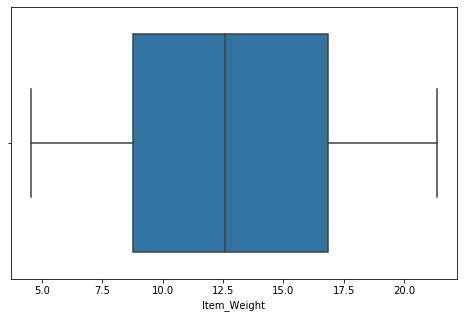

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

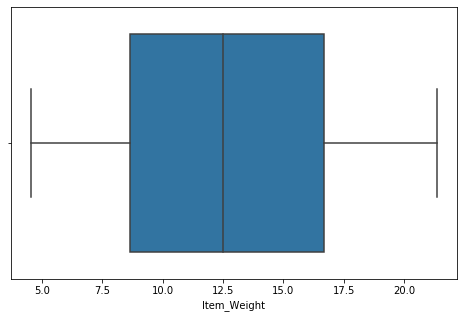

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

_as outliers are highly influenced with mean_

In [24]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [25]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

In [26]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [27]:
print(train['Outlet_Size'].value_counts())
print('************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


___Since outlet_size is a categorical feature ,we can impute missing values with "Mode"(Most repeated value)__

In [28]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [29]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

###  Exploratory data Analysis

In [31]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
print(train.corr())

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


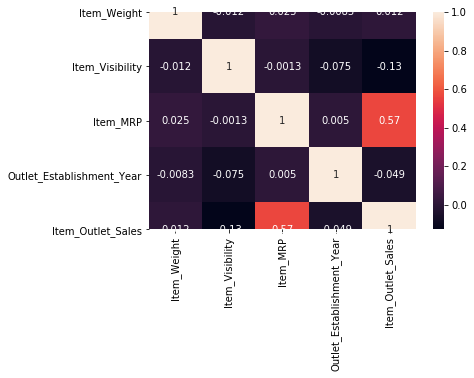

In [33]:
sns.heatmap(train.corr(),annot=True)

In [28]:
categorical_train.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

__we can see some irregularities in this column,need to be fixed__

In [34]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
test['Item_Fat_Content'].replace(['low Fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [35]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

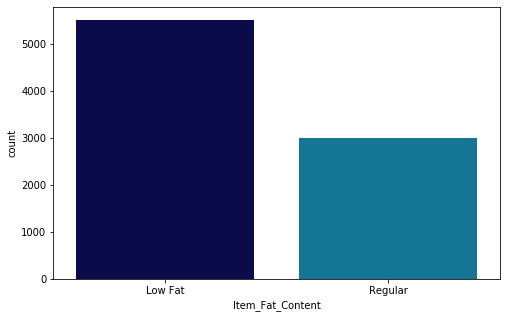

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

__The items bought are more of low fat__

In [37]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

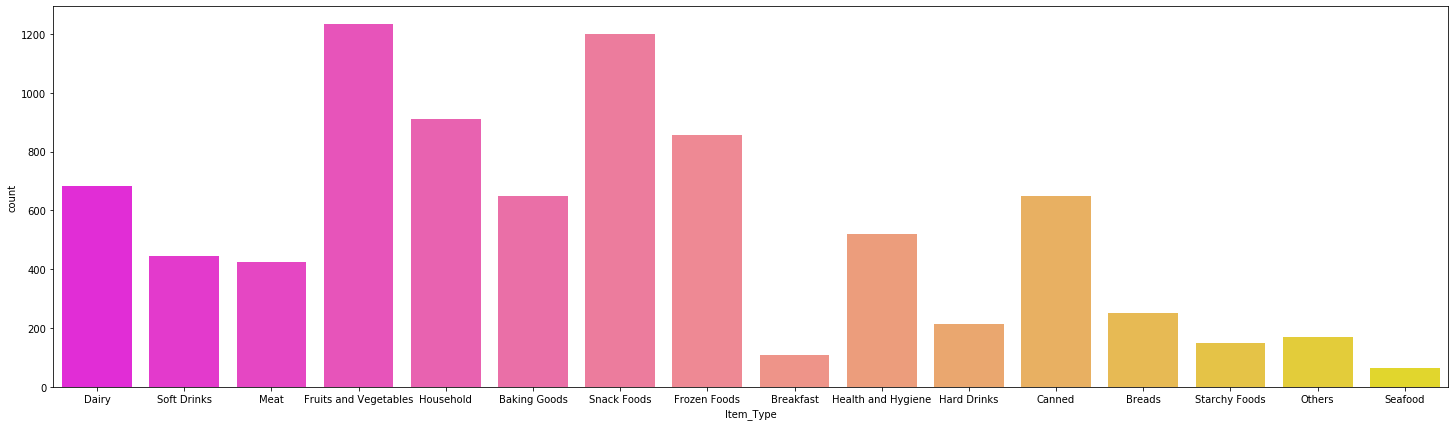

In [38]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

__.Fruits and Vegetables are largely sold as people tend to use them on daily purpose__

__.Snack Foods too have good sales__

In [39]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

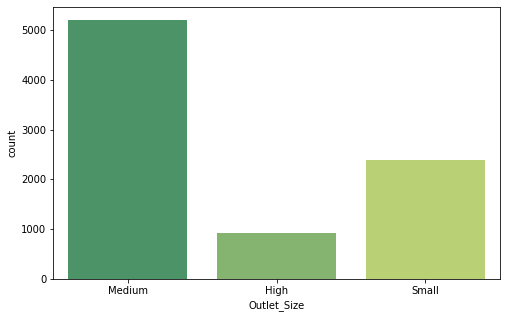

In [40]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

__Outlets are mostly of medium size__

In [41]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

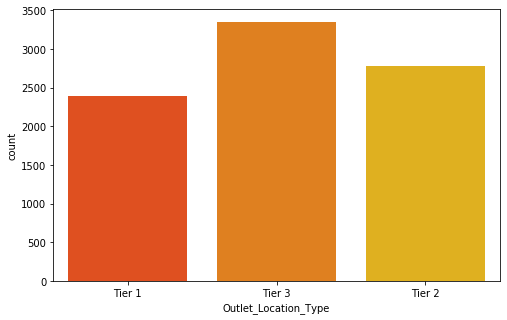

In [42]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

__Maximum Outlets are in Tier 3 location in cities__

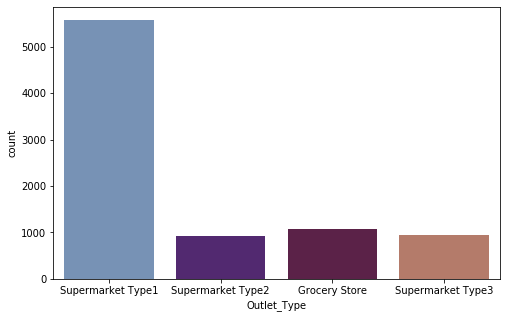

In [43]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

* __The Outlets are more of Supermarket Type1__

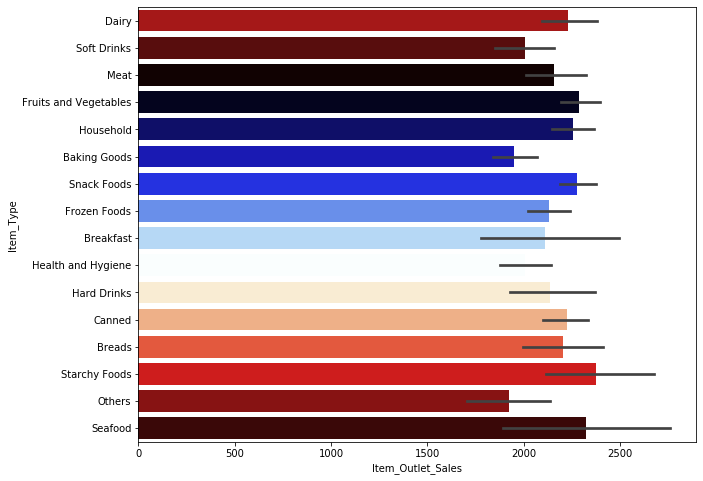

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train,palette='flag')

__The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and 
hence the sales can be improved with having stock of products that are most bought by customers__

In [41]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


* __Encoding the required columns from training and test dataset__

### Model Building

In [47]:
# Seperate Features and Target
X= train.drop(columns=['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [48]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [49]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)

(6818, 11)
(1705, 11)
(6818,)


In [50]:
from sklearn.linear_model import LinearRegression

__Create an instance of a LinearRegression() model named lm.__

In [51]:
lm = LinearRegression()

__Train/fit lm on the training data.__

In [52]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Print out the coefficients of the model__

In [53]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-2.87652593e-03  4.47931771e-01  3.46424707e+01 -1.51791940e+03
  1.51915763e+00  1.56069096e+01  5.75749320e+01  4.67414536e-01
 -3.45561582e+02 -2.42720435e+02  8.94836619e+02]


__Predicting on the validation set__

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

__Use lm.predict() to predict off the X_valid set of the data__

In [54]:
y_pred = lm.predict( X_valid)

__Create a scatterplot of the real test values versus the predicted values__

Text(0, 0.5, 'Predicted Y')

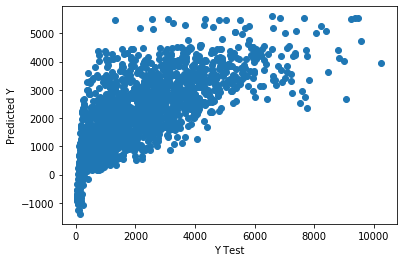

In [55]:
plt.scatter(y_valid,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model with validation set

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [56]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 930.6695091946339
MSE: 1552944.086588582
RMSE: 1246.171772505132


* __Validation Set RMSE score is around 1246 from this linear model__

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

__Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().__

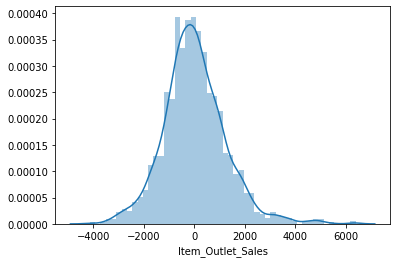

In [57]:
sns.distplot(y_valid-y_pred,bins=50)

### Different ML Models

In [58]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [59]:
algos=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor()]

names=['Linear Regression','Ridge Regression','Lasso Regression','Decision tree regression']

rmse_list=[]

In [60]:
for x in algos:
    model=x
    model.fit(X_train,y_train)
    y_pred=model.predict(X_valid)
    MSE=metrics.mean_squared_error(y_valid,y_pred)
    rmse=np.sqrt(MSE)
    rmse_list.append(rmse)    

In [62]:
evaluation=pd.DataFrame({'Model':names,'RMSE':rmse_list})

In [63]:
evaluation

,Model,RMSE
0,Linear Regression,1246.171773
1,Ridge Regression,1246.061549
2,Lasso Regression,1245.732959
3,Decision tree regression,1585.013561


__We can clearly sees Lasso performs slightly better than other regression model,so we can select Lasso for our final prediction__

## Test data

In [64]:
X_test=test

In [66]:
y_test_pred = lm.predict(X_test)
y_test_pred

array([2144.55489035, 1150.59541895, 2188.94114173, ..., 1844.49058478,
       3198.91479742, 1217.33158961])

In [68]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [69]:
model=Lasso()
model.fit(X,y)
final_predictions=model.predict(test)
submission['Item_Outlet_Sales']=final_predictions
#only positive predictions for the target variable
submission['Item_Outlet_Sales']=submission['Item_Outlet_Sales'].apply(lambda x:0 if x<0 else x)
submission.to_csv("my_submission.csv",index=False)